In [1]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import io
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')

In [3]:
## Uploading the Data

from google.colab import files
uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
# Uploaded dataset as part of notebook, no need to upload -> file not found error when I try to run cell without uploading
df = pd.read_excel(io.BytesIO(uploaded['diabetes.xlsx']))

Saving diabetes.xlsx to diabetes.xlsx


In [4]:
# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No


**Initial data inspection**

In [5]:
#description of features
print(df.shape)
description = df.describe()
description

(10000, 43)


,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,Patient_ID
count,10000.000000,9996.000000,10000.000000,9939.000000,9928.000000,10000.000000,9947.000000,10000.000000,10000.000000,9793.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5406.000000,5137.000000,5411.000000,5137.000000,1.000000e+04
mean,63.197600,130.394358,30.415909,2.540959,1.321803,6.266754,1.553615,6.311903,0.922800,4.558164,0.513900,0.212200,0.642400,0.315600,0.098600,41210.426193,40014.597820,41125.007577,39943.999221,3.940949e+15
std,13.127627,17.018794,6.831567,0.949213,0.402217,0.954380,1.021511,1.733209,0.266922,1.136145,0.499832,0.408886,0.479317,0.464778,0.298139,723.369067,1021.388765,766.210873,971.454948,2.401364e+15
min,18.000000,60.000000,1.376352,0.070000,0.160000,3.400000,0.240000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37966.000000,32509.000000,38023.000000,32509.000000,1.001000e+15
25%,54.000000,120.000000,25.898654,1.820000,1.040000,5.700000,0.950000,5.200000,1.000000,3.710000,0.000000,0.000000,0.000000,0.000000,0.000000,40785.000000,39286.000000,40643.000000,39254.000000,2.001000e+15
50%,64.000000,130.000000,29.300000,2.400000,1.250000,6.000000,1.320000,5.900000,1.000000,4.450000,1.000000,0.000000,1.000000,0.000000,0.000000,41402.000000,39944.000000,41298.000000,39918.000000,4.001000e+15
75%,73.000000,140.000000,33.790000,3.160000,1.540000,6.600000,1.890000,6.900000,1.000000,5.300000,1.000000,0.000000,1.000000,1.000000,0.000000,41773.000000,40770.000000,41745.000000,40687.000000,4.001000e+15
max,90.000000,229.000000,73.400000,8.630000,3.960000,14.300000,22.640000,23.500000,1.000000,12.660000,1.000000,1.000000,1.000000,1.000000,1.000000,42184.000000,42185.000000,42184.000000,42157.000000,1.000100e+16


In [6]:
#number of unique patients
df['Patient_ID'].nunique()

8602

In [7]:
# Checking for missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

Missing data important to note:

* 2 entries of yes diabetes do not have diabetes date (4861 no diabetes, 4863 missing diabetes date) - MCRA
* 4 sBP missing 0 missing sBP date - MCAR
* 61 LDL missing 0 missing LDL date - MCAR
* 72 HDL missing 64 missing HDL date - MCAR
* 53 TG missing 42 missing TG date - MCAR
* 207 missing cholesterole 197 missing cholesterole date - MCAR
* 4863 missing from A1C_BEF_DM and FBS_BEF_DM, matches with number of patients who do not have diabetes* - MNAR
* DM_Onset variables also matches with number of patients without diabetes* - MNAR

Other points to note:
* No definition for leastO and LeastOfAll columns - could also be related to patients without diabetes? missing seems to match - MNAR
Checked with Dr. K. Keshavjee- Reply: "You can safely ignore those.  I used them to calculate a truer date of onset of diabetes. The previous one was not correct in most cases."




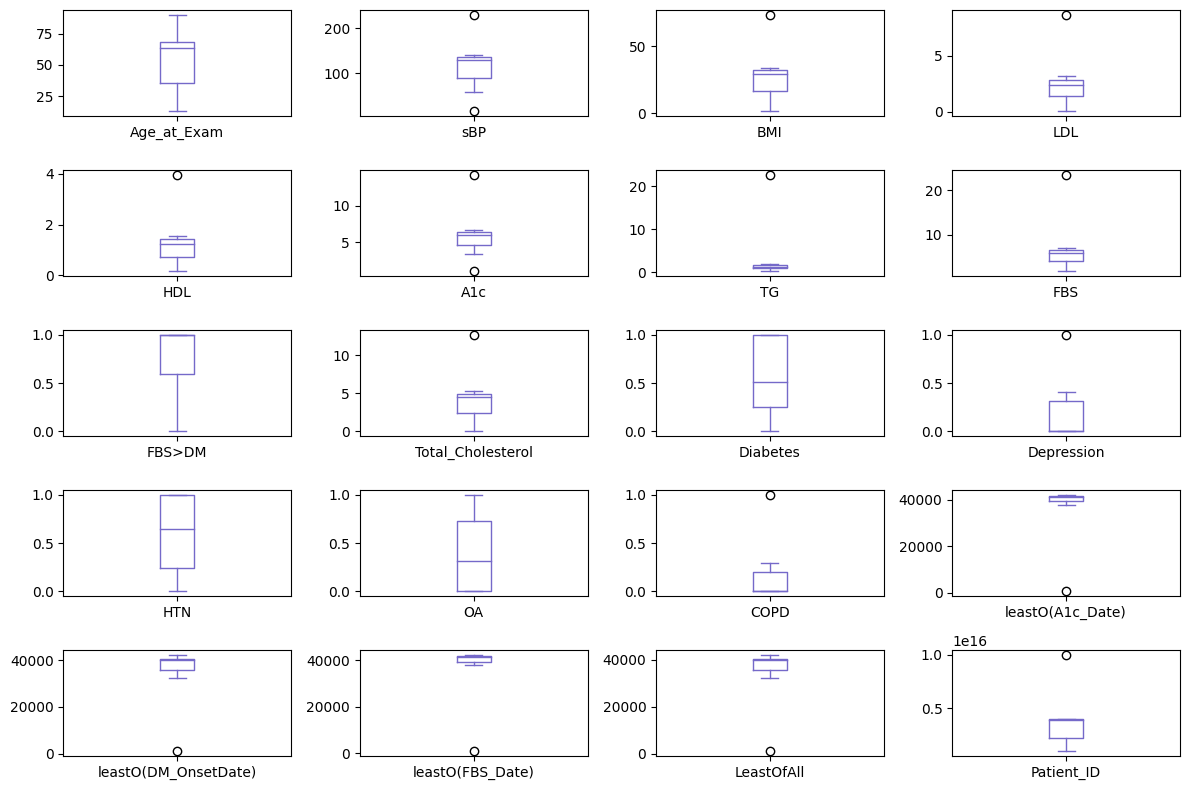

In [8]:
#boxplot of features
description = description.drop('count')
description.plot(kind='box', subplots=True, layout=(5, 4), figsize=(12, 8), color='#7569c9')
plt.tight_layout()
plt.show()

In [9]:
#list of all features that are categorical
features_categorical = ['Diabetes', 'Depression', 'HTN', 'OA', 'COPD', 'Sex' ] #did not include medications because many are combination, too many categories

for i, feature in enumerate(features_categorical):
  #Graph distribution of categories
  counts = df[feature].value_counts()

  # Define your color sequence
  colors = ['#1c3a73', '#7cb1c2']

  fig = px.pie(
      names=counts.index,
      values=counts.values,
      hole=0.5,  # size of the hole, 0.5 means 50%
      title='Distribution of ' + feature,
      color_discrete_sequence=colors  # apply your colors here
  )

  # Update layout for better appearance
  fig.update_layout(
      margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
      legend=dict(
          orientation="v",
          yanchor="top",
          y=0.5,
          xanchor="left",
          x=1.05,
          title=feature
      ),
      title=dict(
          text='Distribution of ' + feature,
          x=0.45,  # Centering the title
          xanchor='center',
          y=0.95,  # Adjusting y position to place title above chart
          yanchor='top',
          font=dict(size=16)
      ),
      width=500,
      height=350
  )

  fig.show()

**Initial Feature Selection and Imputation**

In [10]:
# Feature selection
selected_features = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM', 'Total_Cholesterol', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex','Depression']
selected_df_features = df [selected_features]
selected_df_features_raw = df [selected_features]
print(selected_df_features.isna().sum())

Age_at_Exam            0
sBP                    4
BMI                    0
LDL                   61
HDL                   72
A1c                    0
TG                    53
FBS                    0
FBS>DM                 0
Total_Cholesterol    207
Diabetes               0
HTN                    0
OA                     0
COPD                   0
Sex                    0
Depression             0
dtype: int64


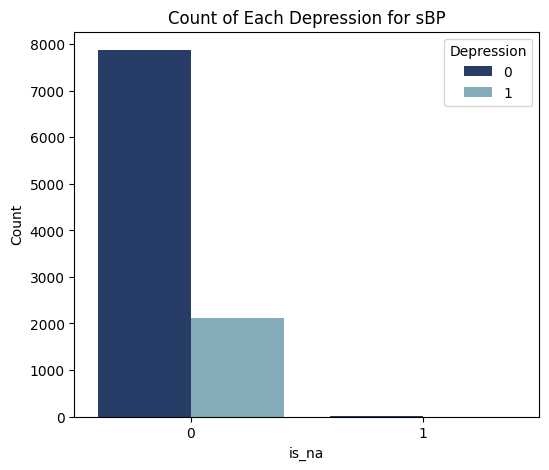

is_na
0    9996
1       4
Name: Depression, dtype: int64


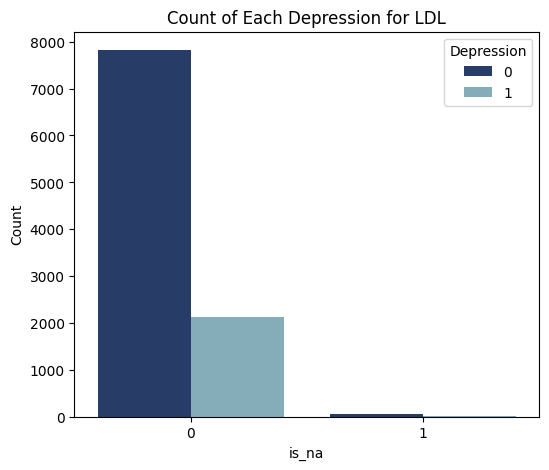

is_na
0    9939
1      61
Name: Depression, dtype: int64


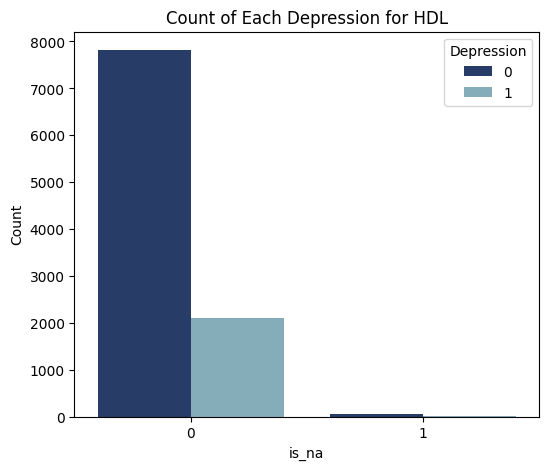

is_na
0    9928
1      72
Name: Depression, dtype: int64


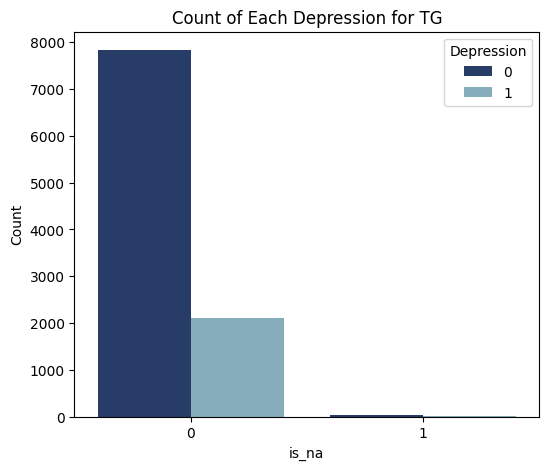

is_na
0    9947
1      53
Name: Depression, dtype: int64


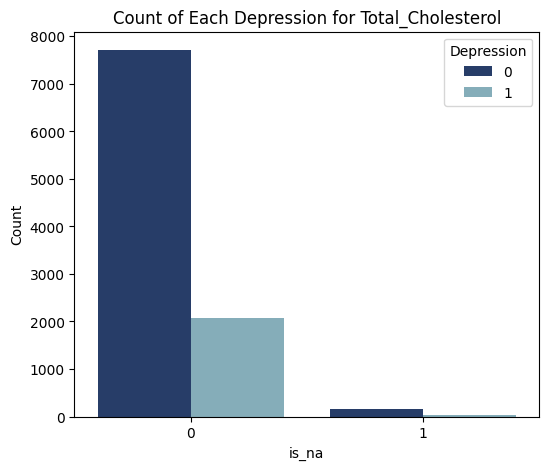

is_na
0    9793
1     207
Name: Depression, dtype: int64


In [11]:
# Understanding missing values and effect on Depression
for i, column in enumerate(selected_df_features):
  if selected_df_features[column].isna().sum() > 0:
    # Create a binary indicator column 'is_ethnicity_na' to represent missing values in the 'ethnicity' column
    selected_df_features['is_na'] = selected_df_features[column].isna().astype(int)

    # Convert the 'Class/ASD' column to string data type
    selected_df_features['Depression'] = selected_df_features['Depression'].astype(str)

    # Define a list of colors for the countplot
    colors = ['#1c3a73', '#7cb1c2']

    # Create a grouped bar chart using seaborn's countplot function with specified colors
    plt.figure(figsize=(6, 5))
    sns.countplot(data=selected_df_features, x='is_na', hue='Depression', palette=colors)

    # Set labels and title for the plot
    plt.xlabel('is_na')
    plt.ylabel('Count')
    plt.title('Count of Each Depression for ' + column)
    plt.legend(title='Depression')
    plt.show()

    # Convert the 'Class/ASD' column back to integer data type
    selected_df_features['Depression'] = selected_df_features['Depression'].astype(int)

    # Calculate the mean of 'Class/ASD' grouped by 'is_ethnicity_na' and print the result
    print(selected_df_features.groupby('is_na')['Depression'].count())

    # Remove the 'is_ethnicity_na' column from the DataFrame
    selected_df_features.drop('is_na', axis=1, inplace=True)

In [12]:
# Convert Sex to numeric
selected_df_features['Sex'].replace({'Female' : 0, 'Male' : 1}, inplace=True)

#Imputation - PUT IN THE BEGINNING
imputer = IterativeImputer(max_iter=10, random_state=42)
df_filled = imputer.fit_transform(selected_df_features)

df_filled=pd.DataFrame(df_filled)
df_filled.columns=selected_features
print(df_filled.isna().sum())
df_filled.head()

Age_at_Exam          0
sBP                  0
BMI                  0
LDL                  0
HDL                  0
A1c                  0
TG                   0
FBS                  0
FBS>DM               0
Total_Cholesterol    0
Diabetes             0
HTN                  0
OA                   0
COPD                 0
Sex                  0
Depression           0
dtype: int64


,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,HTN,OA,COPD,Sex,Depression
0,65.0,126.0,31.000000,1.66,1.110000,5.4,2.28,5.8,1.0,3.810000,0.0,0.0,0.0,0.0,0.0,0.0
1,62.0,135.0,25.846483,2.49,1.370000,5.8,1.37,5.4,1.0,4.480000,0.0,1.0,0.0,0.0,0.0,0.0
2,63.0,133.0,30.900000,1.65,1.472315,6.1,0.76,5.6,1.0,3.517292,0.0,1.0,0.0,1.0,1.0,0.0
3,51.0,136.0,56.710775,2.80,1.940000,6.0,0.99,6.0,1.0,5.190000,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,123.0,33.067867,2.48,1.170000,5.8,1.04,5.2,1.0,4.120000,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#description of features with imputed values
print(df_filled.shape)
description = df_filled.describe()
description

(10000, 16)


,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,HTN,OA,COPD,Sex,Depression
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,63.197600,130.393675,30.415909,2.536124,1.322315,6.266754,1.555301,6.311903,0.922800,4.559309,0.513900,0.642400,0.315600,0.098600,0.466400,0.212200
std,13.127627,17.015765,6.831567,0.955542,0.401679,0.954380,1.034940,1.733209,0.266922,1.133505,0.499832,0.479317,0.464778,0.298139,0.498895,0.408886
min,18.000000,60.000000,1.376352,-1.414127,0.160000,3.400000,0.240000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,120.000000,25.898654,1.820000,1.040000,5.700000,0.950000,5.200000,1.000000,3.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,130.000000,29.300000,2.400000,1.250000,6.000000,1.320000,5.900000,1.000000,4.450000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,140.000000,33.790000,3.160000,1.540000,6.600000,1.890000,6.900000,1.000000,5.300000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,90.000000,229.000000,73.400000,10.123584,3.960000,14.300000,22.640000,23.500000,1.000000,12.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Evaluating complexity, Cross Validation**

In [14]:
# Define a function to preprocess and transform input data
def fit_transform(input_df):
    # Initialize transformers and imputers
    sBP_transofrmer = TargetEncoder()
    LDL_transformer = TargetEncoder()
    HDL_transformer = TargetEncoder()
    TG_transformer = TargetEncoder()
    TC_transformer = TargetEncoder()
    imputer = IterativeImputer(max_iter=10, random_state=0)
    st_x = StandardScaler()

    # Create a copy of the input DataFrame to avoid modifying the original data
    df = input_df.copy()

    # Encode 'sBP' column if it exists
    if 'sBP' in df.columns:
        df['sBP'] = sBP_transofrmer.fit_transform(
            df['sBP'].to_numpy().reshape(-1, 1), df['Depression'].to_numpy()
        )

    # Encode 'LDL' column if it exists
    if 'LDL' in df.columns:
        df['LDL'] = LDL_transformer.fit_transform(
            df['LDL'].to_numpy().reshape(-1, 1), df['Depression'].to_numpy()
        )

    # Encode 'HDL' column if it exists
    if 'HDL' in df.columns:
        df['HDL'] = HDL_transformer.fit_transform(
            df['HDL'].to_numpy().reshape(-1, 1), df['Depression'].to_numpy()
        )

    # Encode 'TG' column if it exists
    if 'TG' in df.columns:
        df['TG'] = TG_transformer.fit_transform(
            df['TG'].to_numpy().reshape(-1, 1), df['Depression'].to_numpy()
        )

    # Encode 'Total_Cholesterol' column if it exists
    if 'Total_Cholesterol' in df.columns:
        df['Total_Cholesterol'] = TC_transformer.fit_transform(
            df['Total_Cholesterol'].to_numpy().reshape(-1, 1), df['Depression'].to_numpy()
        )

    # Perform imputation and standardization on the feature matrix
    X = imputer.fit_transform(df.drop('Depression', axis=1).to_numpy())
    X = st_x.fit_transform(X)

    # Extract the target variable 'Depression'
    Y = df['Depression'].to_numpy()

    # Return the preprocessed feature matrix, target variable, and transformers/imputers
    return X, Y, sBP_transofrmer, LDL_transformer, HDL_transformer, TG_transformer, TC_transformer, imputer, st_x

# Define a function to transform new data using pre-trained transformers and imputers
def transform(input_df, sBP_transofrmer, LDL_transformer, HDL_transformer, TG_transformer, TC_transformer, imputer, st_x):
    # Create a copy of the input DataFrame to avoid modifying the original data
    df = input_df.copy()

    # Encode 'sBP' column if it exists
    if 'sBP' in df.columns:
        df['sBP'] = sBP_transofrmer.transform(
            df['sBP'].to_numpy().reshape(-1, 1)
        )

    # Encode 'LDL' column if it exists
    if 'LDL' in df.columns:
        df['LDL'] = LDL_transformer.transform(
            df['LDL'].to_numpy().reshape(-1, 1)
        )

    # Encode 'HDL' column if it exists
    if 'HDL' in df.columns:
        df['HDL'] = HDL_transformer.transform(
            df['HDL'].to_numpy().reshape(-1, 1)
        )

    # Encode 'TG' column if it exists
    if 'TG' in df.columns:
        df['TG'] = TG_transformer.transform(
            df['TG'].to_numpy().reshape(-1, 1)
        )

    # Encode 'Total_Cholesterol' column if it exists
    if 'Total_Cholesterol' in df.columns:
        df['Total_Cholesterol'] = TC_transformer.transform(
            df['Total_Cholesterol'].to_numpy().reshape(-1, 1)
        )

    # Perform imputation and standardization on the feature matrix
    X = imputer.transform(df.drop('Depression', axis=1).to_numpy())
    X = st_x.transform(X)

    # Return the transformed feature matrix
    return X

 # Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

In [15]:
# Split the data into training and testing sets
x = df_filled.drop('Depression', axis=1)
y = df_filled['Depression']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


# Define a function to run k-fold cross-validation for linear regression
def run_kfold_regression(data_x, data_y, k):
    mean_train_loss = 0
    mean_validation_loss = 0

    kfold = KFold(n_splits=k, shuffle=True)
    for train_indexes, validation_indexes in kfold.split(data_x):
        k_fold_train_x = data_x.iloc[train_indexes]
        k_fold_train_y = data_y.iloc[train_indexes]
        validation_x = data_x.iloc[validation_indexes]
        validation_y = data_y.iloc[validation_indexes]

        model = LogisticRegression()
        model.fit(k_fold_train_x, k_fold_train_y)

        train_y_hat = model.predict(k_fold_train_x)
        train_mse = mean_squared_error(k_fold_train_y, train_y_hat)
        mean_train_loss += train_mse

        validation_y_hat = model.predict(validation_x)
        validation_mse = mean_squared_error(validation_y, validation_y_hat)
        mean_validation_loss += validation_mse

    mean_train_loss /= k
    mean_validation_loss /= k

    return mean_train_loss, mean_validation_loss

# Initialize lists to store model complexity, train loss, and validation loss
model_complexity_list = []
train_loss_list = []
validation_loss_list = []

# Loop over different model complexities
for model_complexity in range(1, 20):
    data_x = pd.DataFrame(np.hstack([X_train**i for i in range(1, model_complexity+1)]))
    data_y = pd.DataFrame(y_train)

    # Run k-fold cross-validation and compute train and validation losses
    train_loss, validation_loss = run_kfold_regression(data_x, data_y, 20)

    model_complexity_list.append(model_complexity)
    train_loss_list.append(train_loss)
    validation_loss_list.append(validation_loss)

<Axes: xlabel='complexity', ylabel='loss'>

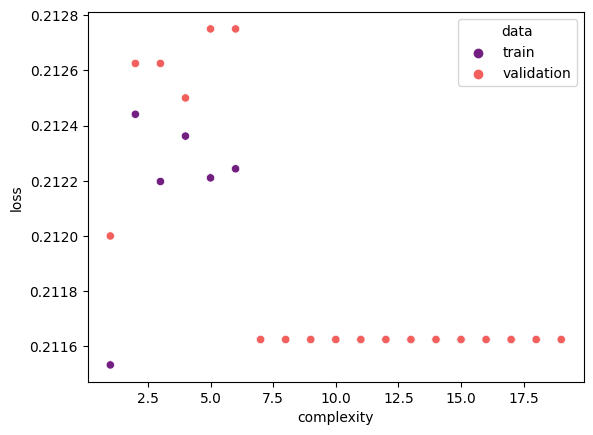

In [16]:
# Create validation data combining training and validation metrics
validation_data = {
    'complexity': model_complexity_list + model_complexity_list,
    'loss': train_loss_list + validation_loss_list,
    'data': ['train'] * len(train_loss_list) + ['validation'] * len(train_loss_list)
}

# Create a DataFrame from the validation data
validation_df = pd.DataFrame(validation_data)
# Create a scatterplot with seaborn, changing the color scheme
sns.scatterplot(data=validation_df, x='complexity', y='loss', hue='data', palette='magma')

Complexity of 7, implement RFECV

**Feature selectiong using Logistic Regression**



In [43]:
# Split the data into training and testing sets
train = selected_df_features.sample(frac=0.7, random_state=10)
test = selected_df_features.drop(train.index)

# Preprocess and transform the training and test sets
X_train, Y_train, sBP_transofrmer, LDL_transformer, HDL_transformer, TG_transformer, TC_transformer, imputer, st_x = fit_transform(train)
X_test = transform(test, sBP_transofrmer, LDL_transformer, HDL_transformer, TG_transformer, TC_transformer, imputer, st_x)
Y_test = test['Depression'].to_numpy()

# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(5)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)
rfecv.fit(X_train, Y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 11


In [46]:
# which columns used and which wasn't
#Original list 'Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'FBS>DM', 'Total_Cholesterol', 'Diabetes', 'HTN', 'OA', 'COPD', 'Sex','Depression'
#Selected features: 'Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'FBS', 'Total_Cholesterol', 'OA', 'COPD', 'Sex','Depression'
rfecv.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True])

In [47]:
# features ranking low is better
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 3, 1, 5, 1, 4, 2, 1, 1, 1])

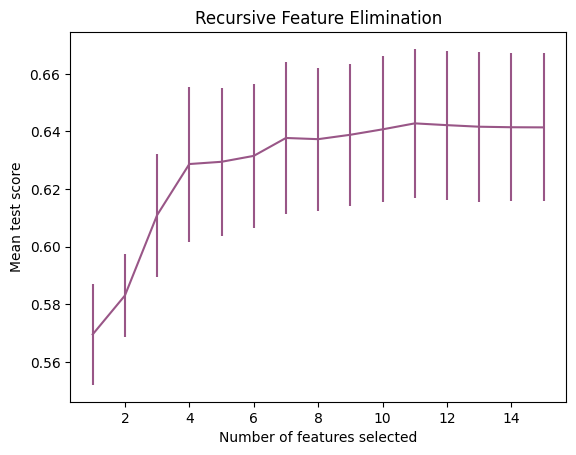

In [20]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

**KNN**


In [ ]:
#KNN
#renaming dataframe to one used for KNN analysis
dfKNN = df
dfKNN.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No


In [ ]:
#importing libraries if not already imported at the beginning of code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.impute import SimpleImputer



In [ ]:
# Preprocess the data
# Encoding 'Sex' column
le_sex = LabelEncoder()
dfKNN['Sex'] = le_sex.fit_transform(dfKNN['Sex'])  # Male: 1, Female: 0

#HAVE TO DEAL WITH MISSING Values

# Split data into features and label
##Selected features based on feature selection analysis: 'Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'FBS', 'Total_Cholesterol', 'OA', 'COPD', 'Sex','Depression'


X = dfKNN[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'FBS', 'Total_Cholesterol', 'OA', 'COPD', 'Sex']]
y = dfKNN['Depression']

# Step 1: Replace NaN values with a placeholder (e.g., mean, median, or a custom value)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train.value_counts()

0    6270
1    1730
Name: Depression, dtype: int64

In [ ]:
## TEST THIS CODE TO DEAL WITH NaN values
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
# Assuming 'X' is your feature matrix, and 'y' is the target variable

# Step 1: Replace NaN values with a placeholder (e.g., mean, median, or a custom value)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed
X = imputer.fit_transform(X)

# Step 2: Split your data into training and testing sets
# (If not done already)

# Step 3: Create and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X, y)

# Step 4: Make predictions
# (Assuming you have a new data point 'new_data_point' with NaN values)
new_data_point = imputer.transform(new_data_point.reshape(1, -1))  # Impute NaN values
prediction = knn.predict(new_data_point)

# 'prediction' will give you the predicted class label based on the nearest neighbors.

In [ ]:
#Determine optimal K-value

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a range of K values to test
k_values = list(range(1, 50))  # Adjust the range as needed

# Create a parameter grid for grid search
param_grid = {'n_neighbors': k_values}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)  # You can adjust the number of cross-validation folds (cv)

# Fit the model to your data
grid_search.fit(X, y)  # Replace X and y with your data

# Get the best K-value from the grid search
best_k = grid_search.best_params_['n_neighbors']
print("Best K-value:", best_k)

Best K-value: 44


Text(0, 0.5, 'Accuracy score')

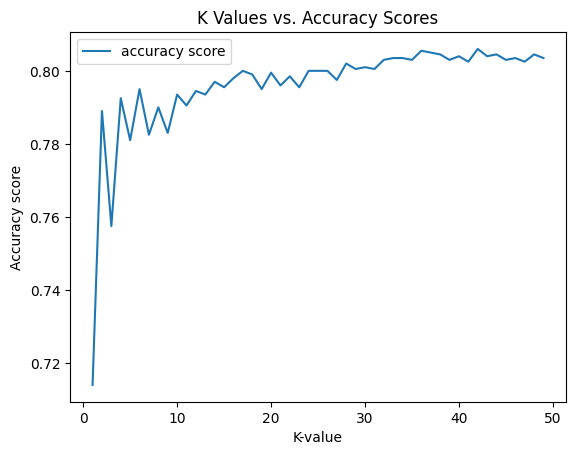

In [ ]:
#check for the best k-values using alternative method
k_vals=[]
ac_scores=[]
for k in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  k_vals.append(k)
  ac_scores.append(accuracy_score(y_test, y_pred))

k_vals=np.array(k_vals)
ac_scores=np.array(ac_scores)
accuracy_k= pd.DataFrame(k_vals,columns=['k'])
accuracy_k['accuracy score']=ac_scores
accuracy_k.plot.line(x='k',y='accuracy score', title='K Values vs. Accuracy Scores')
plt.xlabel('K-value')
plt.ylabel('Accuracy score')

In [ ]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=8)  # Setting K to number determined in the previous step = 8
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1549   59]
 [ 361   31]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1608
           1       0.34      0.08      0.13       392

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



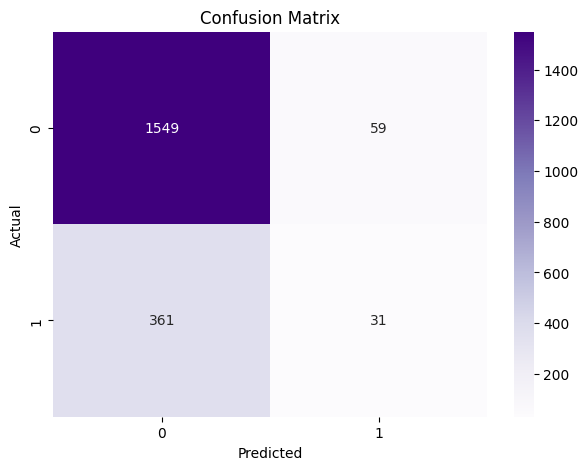

In [ ]:
#Confusion Matrix Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = dfKNN['Depression'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Logistic Regression**

In [ ]:
df_Log=df_filled
df_Log.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,HTN,OA,COPD,Sex,Depression
0,65.0,126.0,31.000000,1.66,1.110000,5.4,2.28,5.8,1.0,3.810000,0.0,0.0,0.0,0.0,0.0,0.0
1,62.0,135.0,25.846483,2.49,1.370000,5.8,1.37,5.4,1.0,4.480000,0.0,1.0,0.0,0.0,0.0,0.0
2,63.0,133.0,30.900000,1.65,1.472315,6.1,0.76,5.6,1.0,3.517292,0.0,1.0,0.0,1.0,1.0,0.0
3,51.0,136.0,56.710775,2.80,1.940000,6.0,0.99,6.0,1.0,5.190000,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,123.0,33.067867,2.48,1.170000,5.8,1.04,5.2,1.0,4.120000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data=df_Log

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
X = data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'FBS', 'Total_Cholesterol', 'OA', 'COPD', 'Sex']]
y = data['Depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1566   10]
 [ 418    6]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      1576
         1.0       0.38      0.01      0.03       424

    accuracy                           0.79      2000
   macro avg       0.58      0.50      0.45      2000
weighted avg       0.70      0.79      0.70      2000



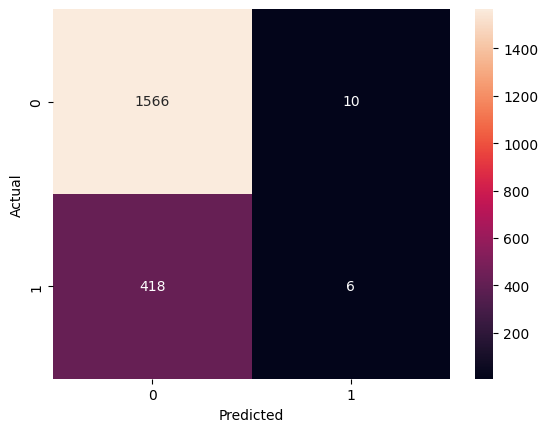

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Separate features and target variable
X = data[['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'FBS', 'Total_Cholesterol', 'OA', 'COPD', 'Sex']]
y = data['Depression']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.493141
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                 0.04589
Time:                        02:09:42   Log-Likelihood:                -4931.4
converged:                       True   LL-Null:                       -5168.6
Covariance Type:            nonrobust   LLR p-value:                 9.520e-95
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1600      0.333      0.481      0.631      -0.492       0.812
Age_at_E

IndexError: ignored

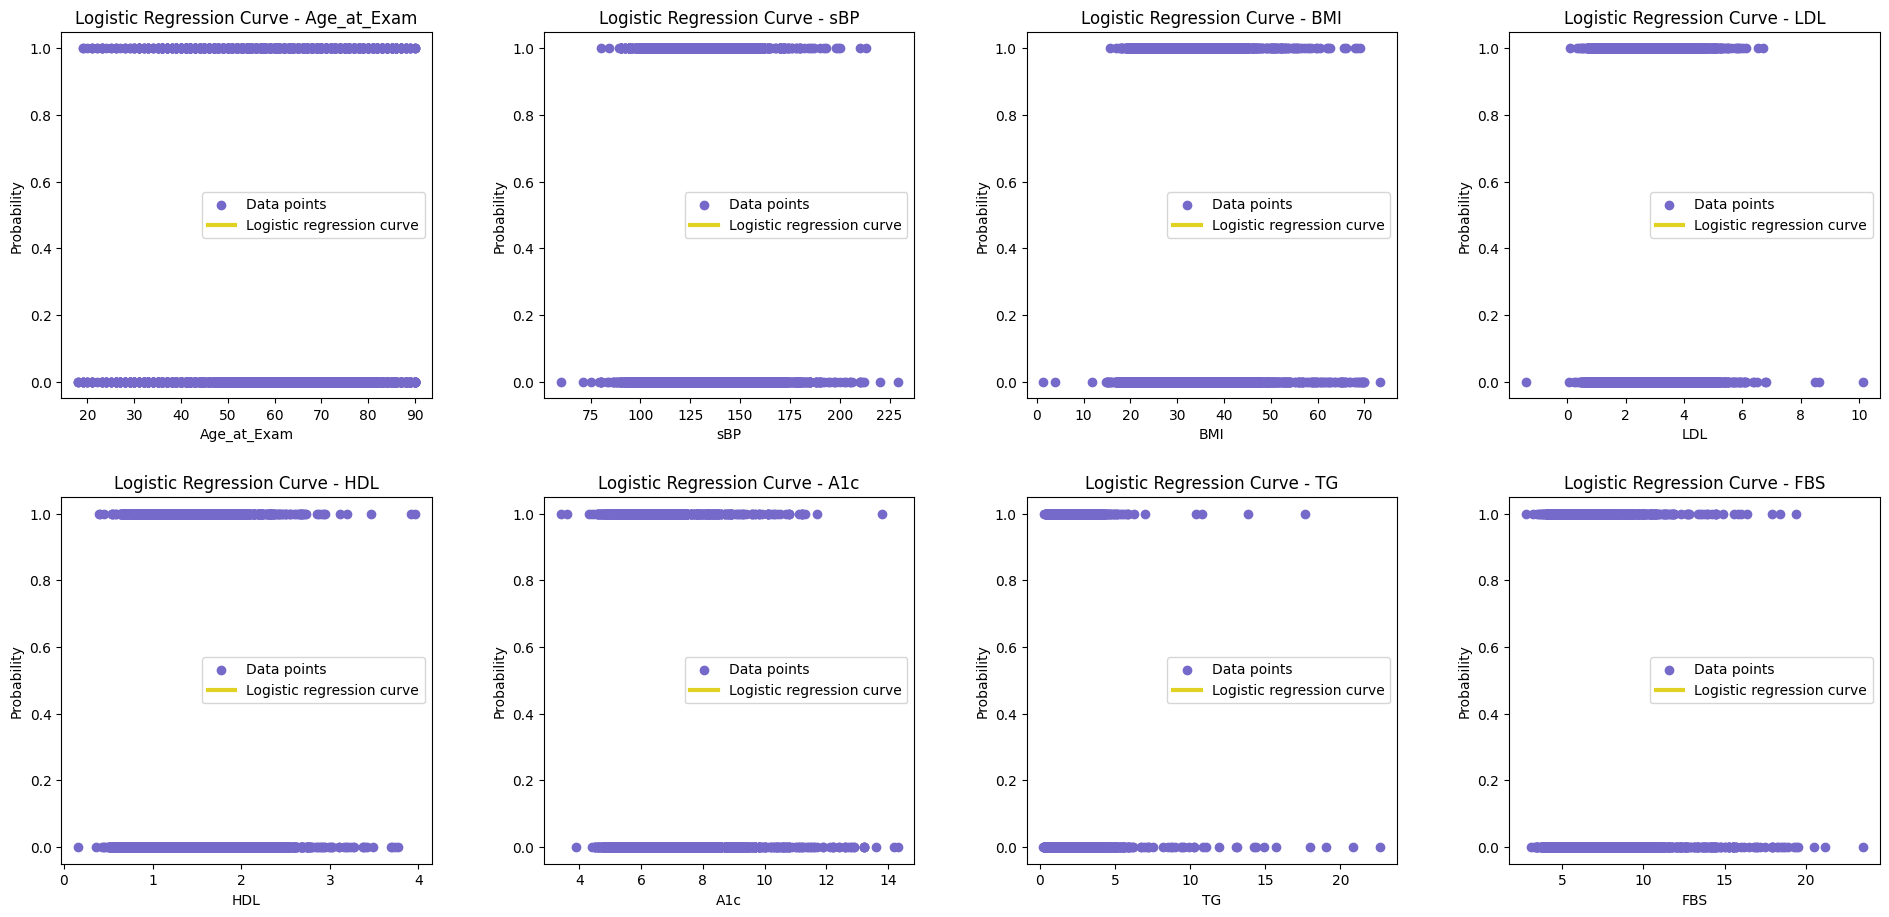

In [ ]:
log_reg = LogisticRegression()

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(data.columns[:-1]):  # Exclude 'Outcome' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = data[[feature]]
    y = data['Depression']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 1)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

**Naïve Bayes**



In [21]:
#Naïve Bayes
newly_selected_features = ['Age_at_Exam', 'sBP', 'BMI', 'LDL', 'HDL', 'A1c', 'TG', 'FBS', 'Total_Cholesterol', 'HTN', 'OA', 'COPD', 'Sex','Depression']
dfNB_C = df_filled[newly_selected_features] #yes/no values
dfNB = df_filled[newly_selected_features] #0/1 values

In [22]:
# Converting categorical features that are stored as int to Categories so we can visualize easier
dfNB_C['HTN'].replace({0 : 'no', 1 : 'yes'}, inplace=True)
dfNB_C['OA'].replace({0 : 'no', 1 : 'yes'}, inplace=True)
dfNB_C['Depression'].replace({0 : 'no', 1 : 'yes'}, inplace=True)
dfNB_C['COPD'].replace({0 : 'no', 1 : 'yes'}, inplace=True)
dfNB_C['Sex'].replace({0 : 'Female', 1 : 'Male'}, inplace=True)
print(dfNB_C.head())

   Age_at_Exam    sBP        BMI   LDL       HDL  A1c    TG  FBS  \
0         65.0  126.0  31.000000  1.66  1.110000  5.4  2.28  5.8   
1         62.0  135.0  25.846483  2.49  1.370000  5.8  1.37  5.4   
2         63.0  133.0  30.900000  1.65  1.472315  6.1  0.76  5.6   
3         51.0  136.0  56.710775  2.80  1.940000  6.0  0.99  6.0   
4         40.0  123.0  33.067867  2.48  1.170000  5.8  1.04  5.2   

   Total_Cholesterol  HTN  OA COPD     Sex Depression  
0           3.810000   no  no   no  Female         no  
1           4.480000  yes  no   no  Female         no  
2           3.517292  yes  no  yes    Male         no  
3           5.190000   no  no   no  Female         no  
4           4.120000   no  no   no  Female        yes  


In [23]:
# create list of numerical, categorical, multinomial features
target_column = 'Depression'
categorical_columns = ['Sex']
boolean_columns = ['HTN', 'OA', 'COPD']
numerical_columns = [i for i in dfNB_C.columns if i not in categorical_columns + [target_column] + boolean_columns]
dfNB_C.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,Total_Cholesterol,HTN,OA,COPD,Sex,Depression
0,65.0,126.0,31.000000,1.66,1.110000,5.4,2.28,5.8,3.810000,no,no,no,Female,no
1,62.0,135.0,25.846483,2.49,1.370000,5.8,1.37,5.4,4.480000,yes,no,no,Female,no
2,63.0,133.0,30.900000,1.65,1.472315,6.1,0.76,5.6,3.517292,yes,no,yes,Male,no
3,51.0,136.0,56.710775,2.80,1.940000,6.0,0.99,6.0,5.190000,no,no,no,Female,no
4,40.0,123.0,33.067867,2.48,1.170000,5.8,1.04,5.2,4.120000,no,no,no,Female,yes


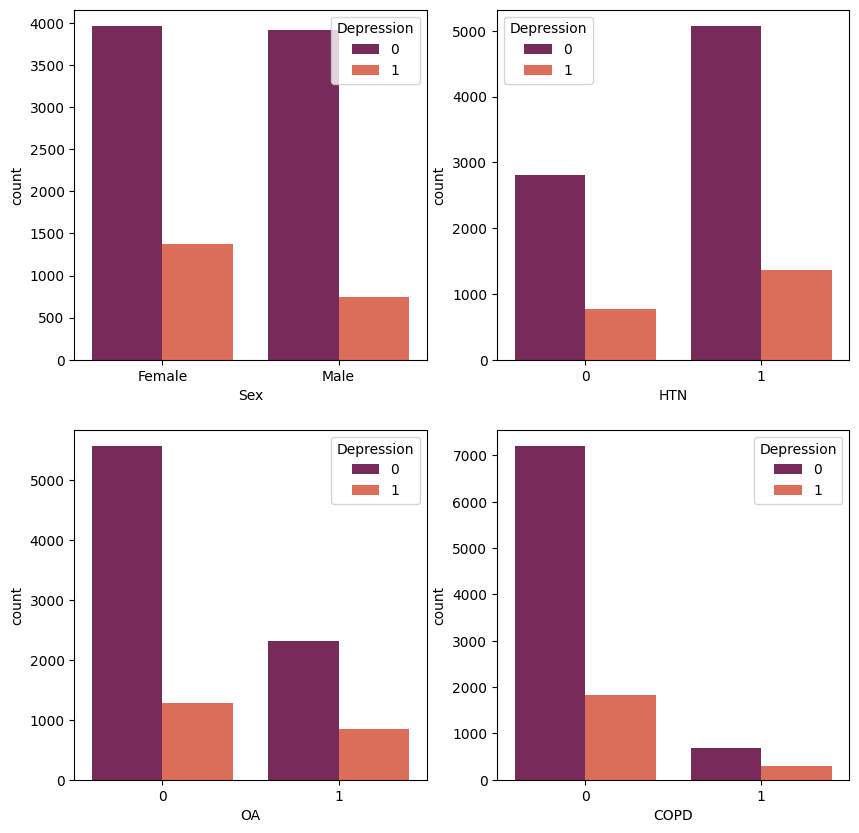

In [24]:
# Checking the difference in the distribution of categorical features across two classes

# Initialize a 2x2 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

# Loop through each categorical column to plot its distribution
for i, column in enumerate(categorical_columns + boolean_columns):
    # Determine the subplot's position based on the current index
    x = i // 2
    y = i % 2

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=df, x=column, hue='Depression', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

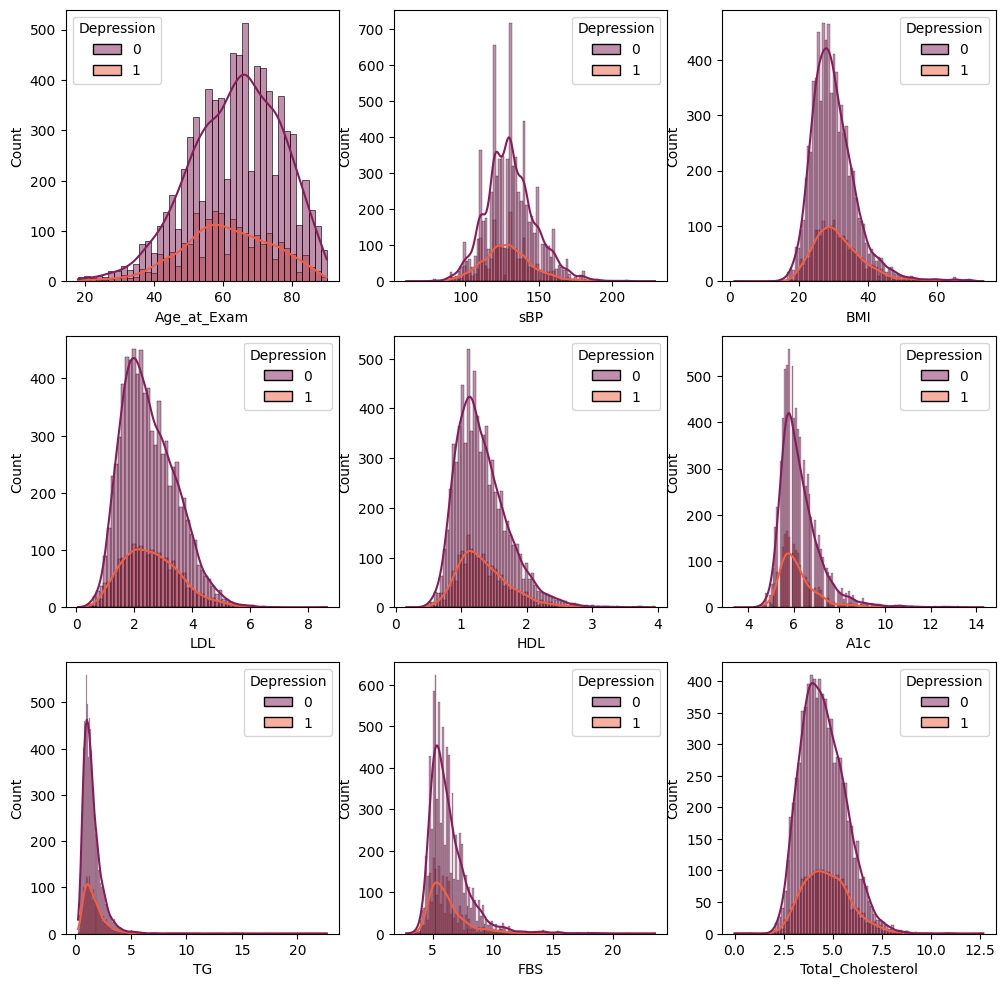

In [25]:
# checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(df, x=column, hue='Depression', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

In [26]:
# Checking for data imbalance

# Compute the count of each class in the 'Diabetes' column
counts = dfNB_C['Depression'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Diabetes"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in "Depression"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

<Axes: >

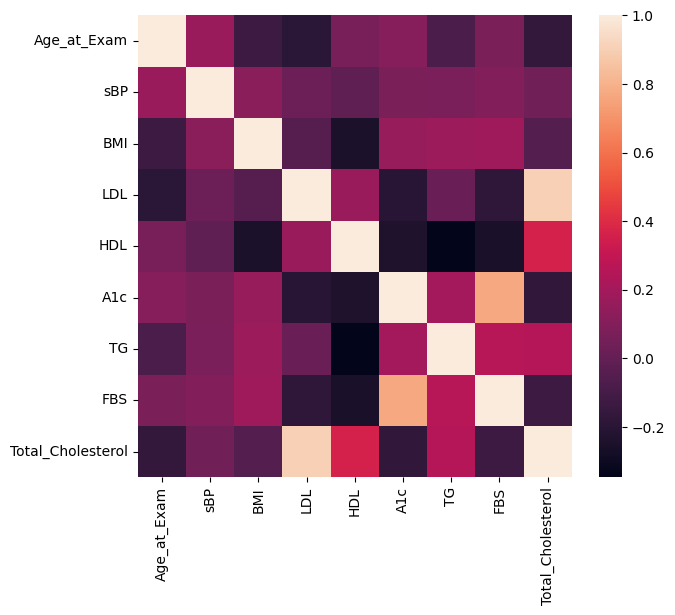

In [27]:
plt.figure(figsize=(7,6))
sns.heatmap(dfNB_C[numerical_columns + [target_column]].corr())

In [48]:
# Binning the 'age' column
# This will transform ages to category numbers based on which range they fall into
dfNB['Age_at_Exam'] = np.digitize(dfNB['Age_at_Exam'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100])

# Binning the 'sBP' column
dfNB['sBP'] = np.digitize(dfNB['sBP'], bins=[60, 70, 80, 90, 100, 110, 120, 130, 140, 160, 180, 190, 200, 210, 220])

# Binning the 'BMI' column (cholesterol level)
dfNB['BMI'] = np.digitize(dfNB['BMI'], bins=[15, 20, 25, 30, 35, 40, 45, 50])

In [55]:
# create list of numerical, categorical, multinomial features
target_column = 'Depression'
categorical_columns = ['Sex', 'Age_at_Exam', 'sBP', 'BMI']
boolean_columns = [ 'OA', 'COPD']
numerical_columns = [i for i in dfNB_C.columns if i not in categorical_columns + [target_column] + boolean_columns]
dfNB_C.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,Total_Cholesterol,HTN,OA,COPD,Sex,Depression
0,65.0,126.0,31.000000,1.66,1.110000,5.4,2.28,5.8,3.810000,no,no,no,Female,no
1,62.0,135.0,25.846483,2.49,1.370000,5.8,1.37,5.4,4.480000,yes,no,no,Female,no
2,63.0,133.0,30.900000,1.65,1.472315,6.1,0.76,5.6,3.517292,yes,no,yes,Male,no
3,51.0,136.0,56.710775,2.80,1.940000,6.0,0.99,6.0,5.190000,no,no,no,Female,no
4,40.0,123.0,33.067867,2.48,1.170000,5.8,1.04,5.2,4.120000,no,no,no,Female,yes


In [56]:
dfNB['Sex'].replace({'Female' : 0, 'Male' : 1}, inplace=True)
# Splitting the original dataset into training, validation, and test sets

# Taking 70% of the data for training
train_dfNB = dfNB.sample(frac = 0.7)

# Removing the training data from the original dataset to get the combined validation and test data
test_dfNB = dfNB.drop(train_dfNB.index)

# Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_dfNB = test_dfNB.sample(frac = 0.5)
test_dfNB = test_dfNB.drop(valid_dfNB.index)

In [57]:
#Ensure there is no zero probability
for i, column in enumerate(categorical_columns+boolean_columns):
  # Calculate the number of instances in the training set where 'sex' is 1 and 'target' is 1
  num_x_1_and_y_1 = len(train_dfNB[(train_dfNB[column] == 1) & (train_dfNB['Depression'] == 1)])

  # Calculate the number of instances in the training set where 'target' is 1
  num_y_1 = len(train_dfNB[train_dfNB['Depression'] == 1])

  # Compute the conditional probability P(Sex=1 | Y=1) by dividing the two numbers
  P_X_1_Y_1 = num_x_1_and_y_1 / num_y_1

  # Display the computed probability
  print(column+": "+str(P_X_1_Y_1))

# Note: For a complete model, similar probabilities would be computed for all feature-value and class label combinations
# and stored in a table or matrix format for easy reference during prediction.

Sex: 0.35636856368563685
Age_at_Exam: 0.009485094850948509
sBP: 0.0
BMI: 0.013550135501355014
OA: 0.38346883468834686
COPD: 0.13685636856368563


AUC :  0.5027046305944595
Accuracy :  0.7871428571428571
Confusion Matrix:
[[5494   30]
 [1460   16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      5524
         1.0       0.35      0.01      0.02      1476

    accuracy                           0.79      7000
   macro avg       0.57      0.50      0.45      7000
weighted avg       0.70      0.79      0.70      7000



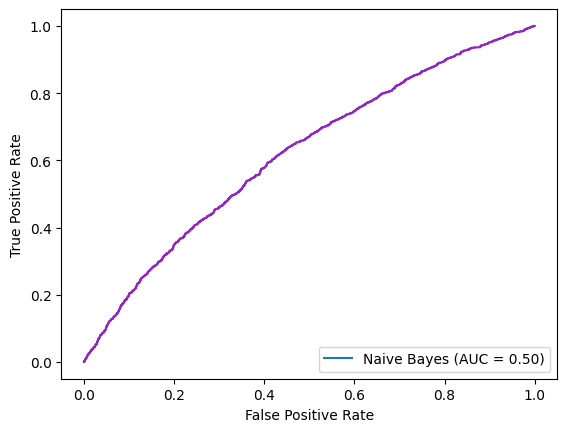

In [58]:
# Train a Gaussian Naive Bayes model for numerical columns
gnb = GaussianNB()
gnb = gnb.fit(train_dfNB[numerical_columns].to_numpy(), train_dfNB[target_column])

# Train a Categorical Naive Bayes model for categorical columns
cnb = CategoricalNB(alpha=100)
cnb = cnb.fit(train_dfNB[categorical_columns].to_numpy(), train_dfNB[target_column])

# Create a BernoulliNB classifier
clf = BernoulliNB(alpha=1.0, binarize=0.5, fit_prior=True, class_prior=None)
clf = clf.fit(train_dfNB[boolean_columns].to_numpy(), train_dfNB[target_column])
# Train a Multinomial Naive Bayes model for count-based (multinomial) columns
#mnb = MultinomialNB()
#mnb = mnb.fit(train_dfNB[multinomial_columns].to_numpy(), train_dfNB[target_column])

# Get joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(train_dfNB[numerical_columns])
cnb_log_pred = cnb.predict_joint_log_proba(train_dfNB[categorical_columns])
clf_log_pred = clf.predict_joint_log_proba(train_dfNB[boolean_columns])
#mnb_log_pred = mnb.predict_joint_log_proba(train_dfNB[multinomial_columns])

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + cnb_log_pred + clf_log_pred - 2* clf.class_log_prior_

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions
conf_matrix, class_report, auc, acc = get_scores(train_dfNB[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(train_dfNB[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')

AUC :  0.4994904944555345
Accuracy :  0.7766666666666666
Confusion Matrix:
[[1162   12]
 [ 323    3]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87      1174
         1.0       0.20      0.01      0.02       326

    accuracy                           0.78      1500
   macro avg       0.49      0.50      0.45      1500
weighted avg       0.66      0.78      0.69      1500



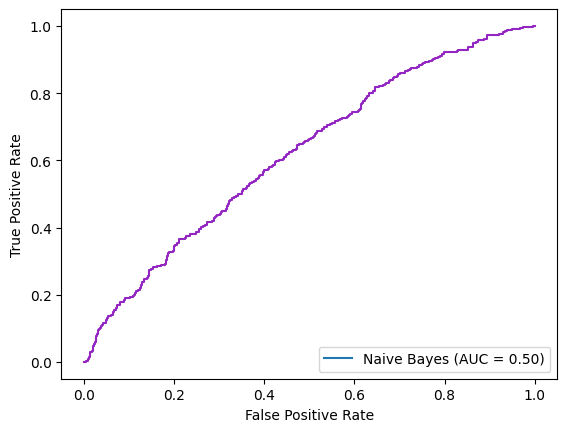

In [59]:
# Predict the joint log probabilities for each model on validation data
gnb_log_pred = gnb.predict_joint_log_proba(valid_dfNB[numerical_columns])
cnb_log_pred = cnb.predict_joint_log_proba(valid_dfNB[categorical_columns])
clf_log_pred = clf.predict_joint_log_proba(valid_dfNB[boolean_columns])
#mnb_log_pred = mnb.predict_joint_log_proba(valid_df[multinomial_columns])

# Combine the log probabilities, adjusting for the multiplication of P(Y) term
y_hat_prob = gnb_log_pred + cnb_log_pred + clf_log_pred - 2* clf.class_log_prior_

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels for validation data
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model on validation data using custom functions
conf_matrix, class_report, auc, acc = get_scores(valid_dfNB[target_column], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve for validation data
fpr, tpr, thresholds = roc_curve(valid_dfNB[target_column], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#9325c2')